In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=2)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8064 - loss: 0.5095 - val_accuracy: 0.8134 - val_loss: 0.4883
Epoch 2/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8039 - loss: 0.4938 - val_accuracy: 0.8134 - val_loss: 0.4965
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8035 - loss: 0.5108
CNN Validation Accuracy: 81.34%
Models built for CNN, RNN, and GANs


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8113 - loss: 0.5150 - val_accuracy: 0.8134 - val_loss: 0.4903
Epoch 2/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8111 - loss: 0.4887 - val_accuracy: 0.8134 - val_loss: 0.4946
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8077 - loss: 0.5024
CNN Validation Accuracy: 81.34%


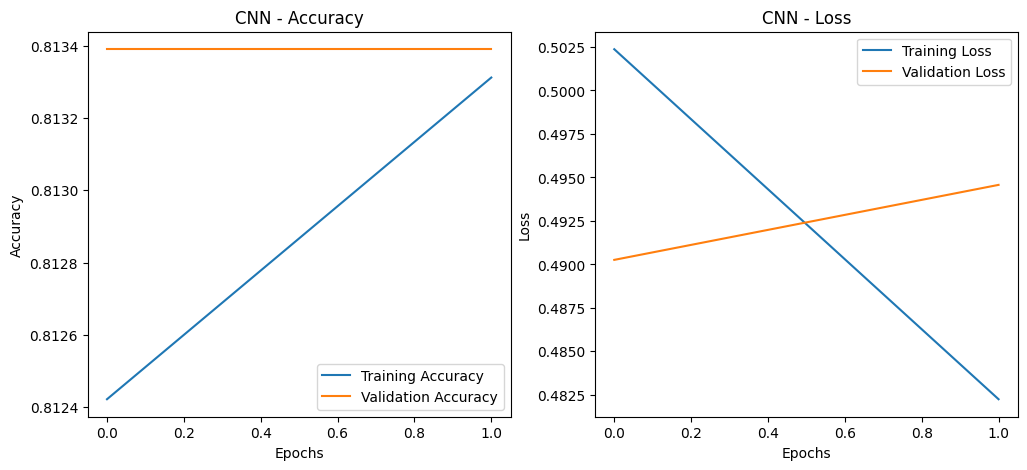

Displaying Actual vs Predicted Images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


KeyError: 1

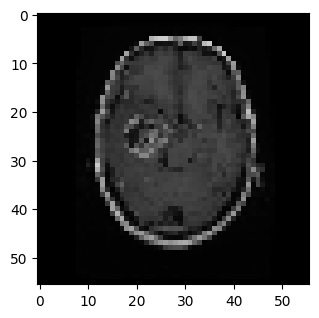

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential([
        layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(train_data.class_indices), activation='softmax')
    ])

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=2)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# ----------------------------- Visualizations -----------------------------
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')
    plt.show()

# Plot CNN Results
plot_history(cnn_history, 'CNN')

# ----------------------------- Display Predictions -----------------------------
def display_predictions(model, data):
    images, labels = next(data)
    predictions = model.predict(images)

    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        actual_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])
        plt.title(f"Actual: {data.class_indices[actual_label]}\nPredicted: {data.class_indices[predicted_label]}")
        plt.axis('off')
    plt.show()

print("Displaying Actual vs Predicted Images")
display_predictions(cnn_model, val_data)

# You can follow a similar structure to add visualizations for RNN and GANs if needed.


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7904 - loss: 0.5254 - val_accuracy: 0.8134 - val_loss: 0.4877
Epoch 2/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8115 - loss: 0.4868 - val_accuracy: 0.8134 - val_loss: 0.4873
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8237 - loss: 0.4742
CNN Validation Accuracy: 81.34%


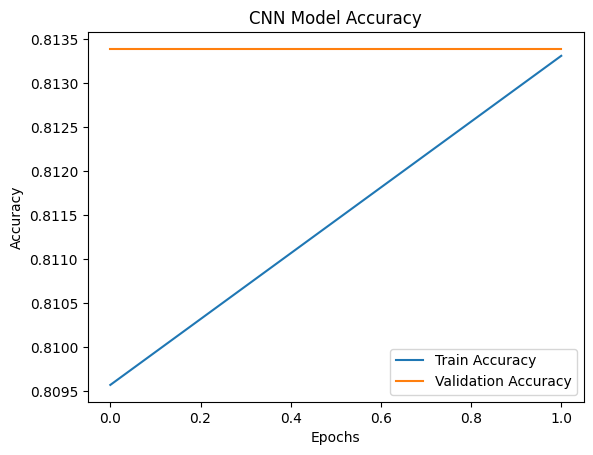

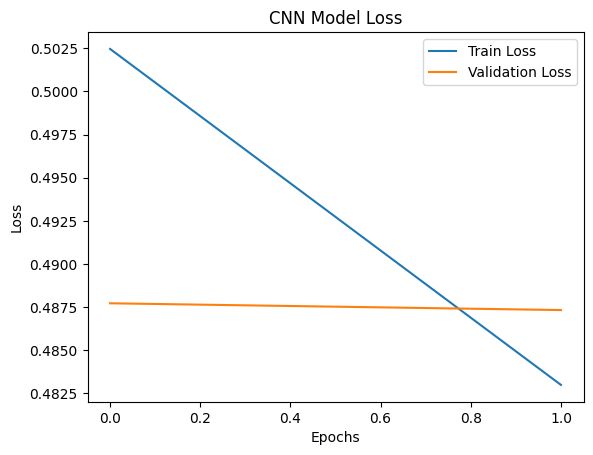

Models built for CNN, RNN, and GANs


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=2)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.7946 - loss: 0.5331 - val_accuracy: 0.8134 - val_loss: 0.4862
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8084 - loss: 0.4918 - val_accuracy: 0.8134 - val_loss: 0.4871
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8158 - loss: 0.4754 - val_accuracy: 0.8134 - val_loss: 0.4865
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.8021 - loss: 0.4890 - val_accuracy: 0.8134 - val_loss: 0.4911
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8118 - loss: 0.4685 - val_accuracy: 0.8134 - val_loss: 0.4887
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.8193 - loss: 0.4535 - val_accuracy: 0.8134 - val_loss: 0.5046
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8117 - loss: 0.4683 - val_accuracy: 0.8134 - val_loss: 0.4931
Epoch 

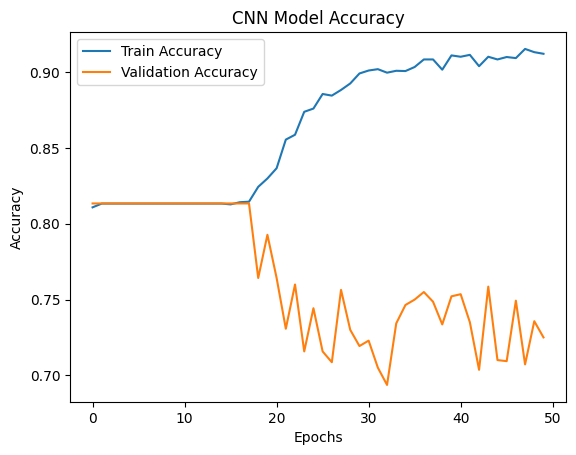

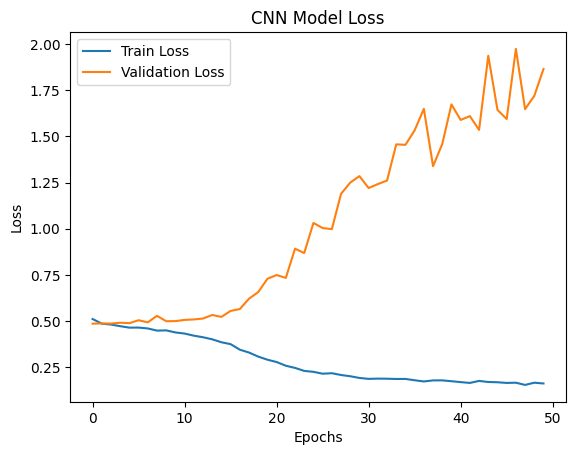

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


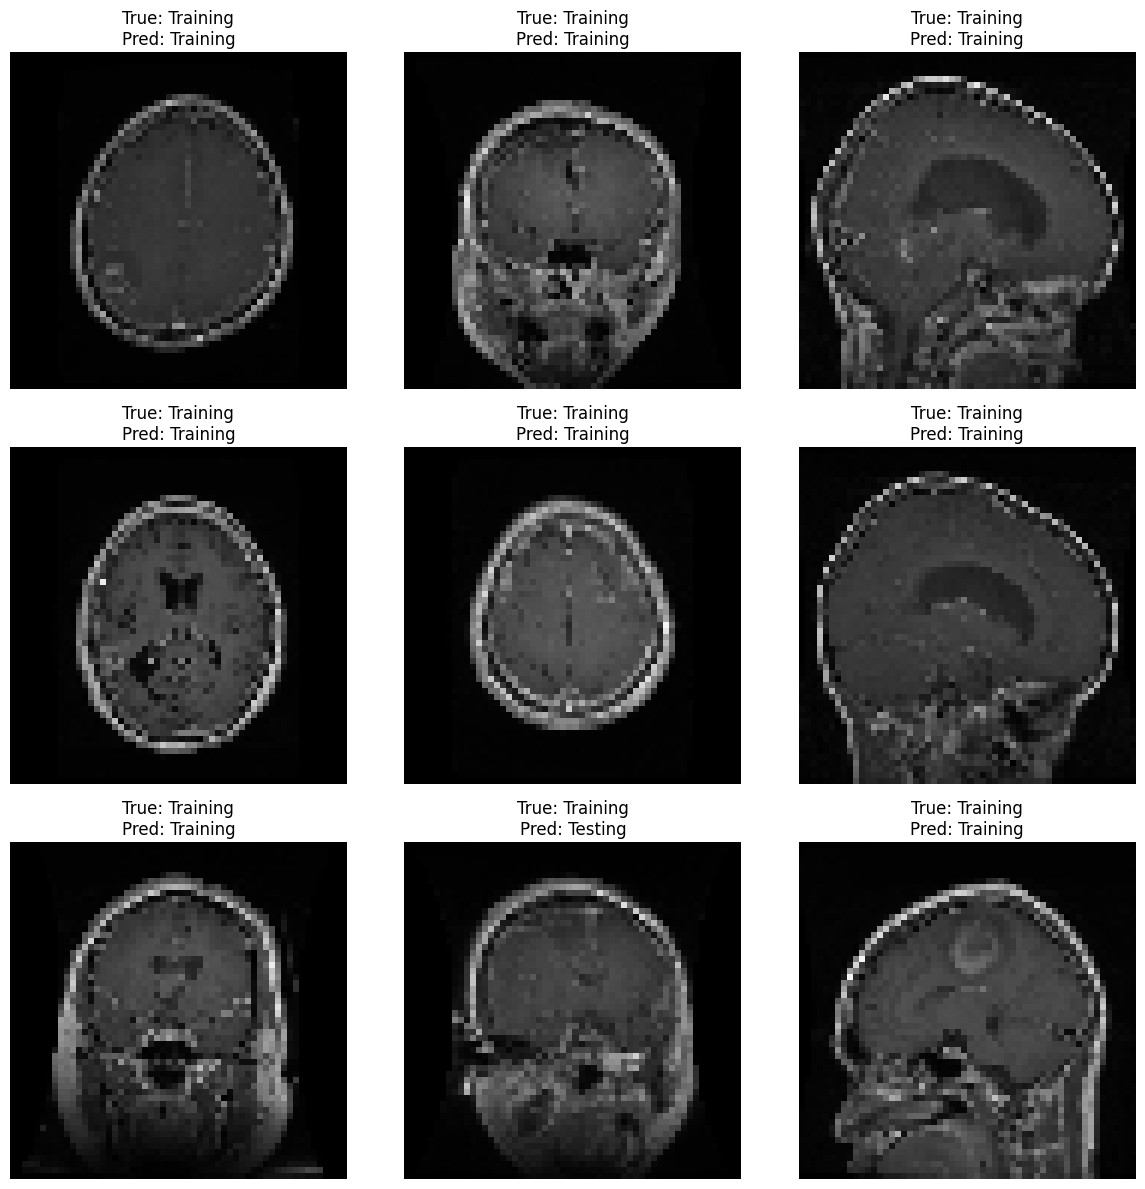

Models built for CNN, RNN, and GANs


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [ 
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=50)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display actual vs predicted images for CNN
import random

x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8015 - loss: 0.5173 - val_accuracy: 0.8134 - val_loss: 0.4976
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8084 - loss: 0.4879 - val_accuracy: 0.8134 - val_loss: 0.4865
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8163 - loss: 0.4747 - val_accuracy: 0.8134 - val_loss: 0.4857
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8162 - loss: 0.4673 - val_accuracy: 0.8134 - val_loss: 0.4923
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8122 - loss: 0.4646 - val_accuracy: 0.8134 - val_loss: 0.4975
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.8085 - loss: 0.4692 - val_accuracy: 0.8134 - val_loss: 0.5212
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.8106 - loss: 0.4662 - val_accuracy: 0.8134 - val_loss: 0.4964
Epoch 

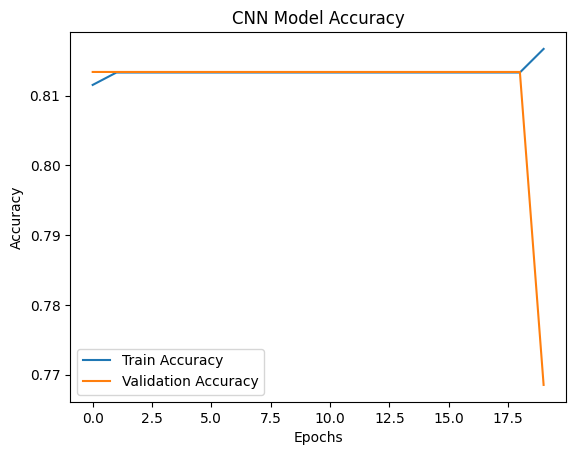

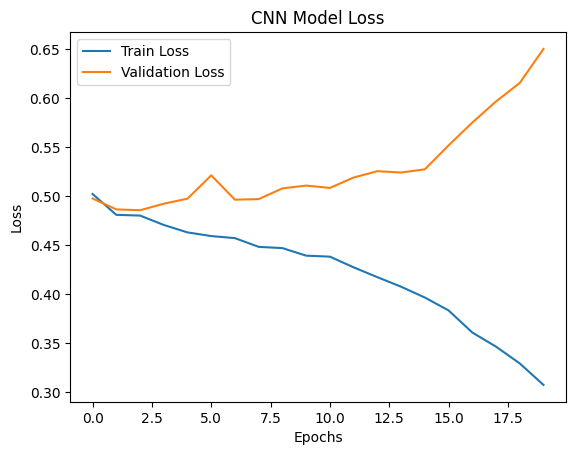

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


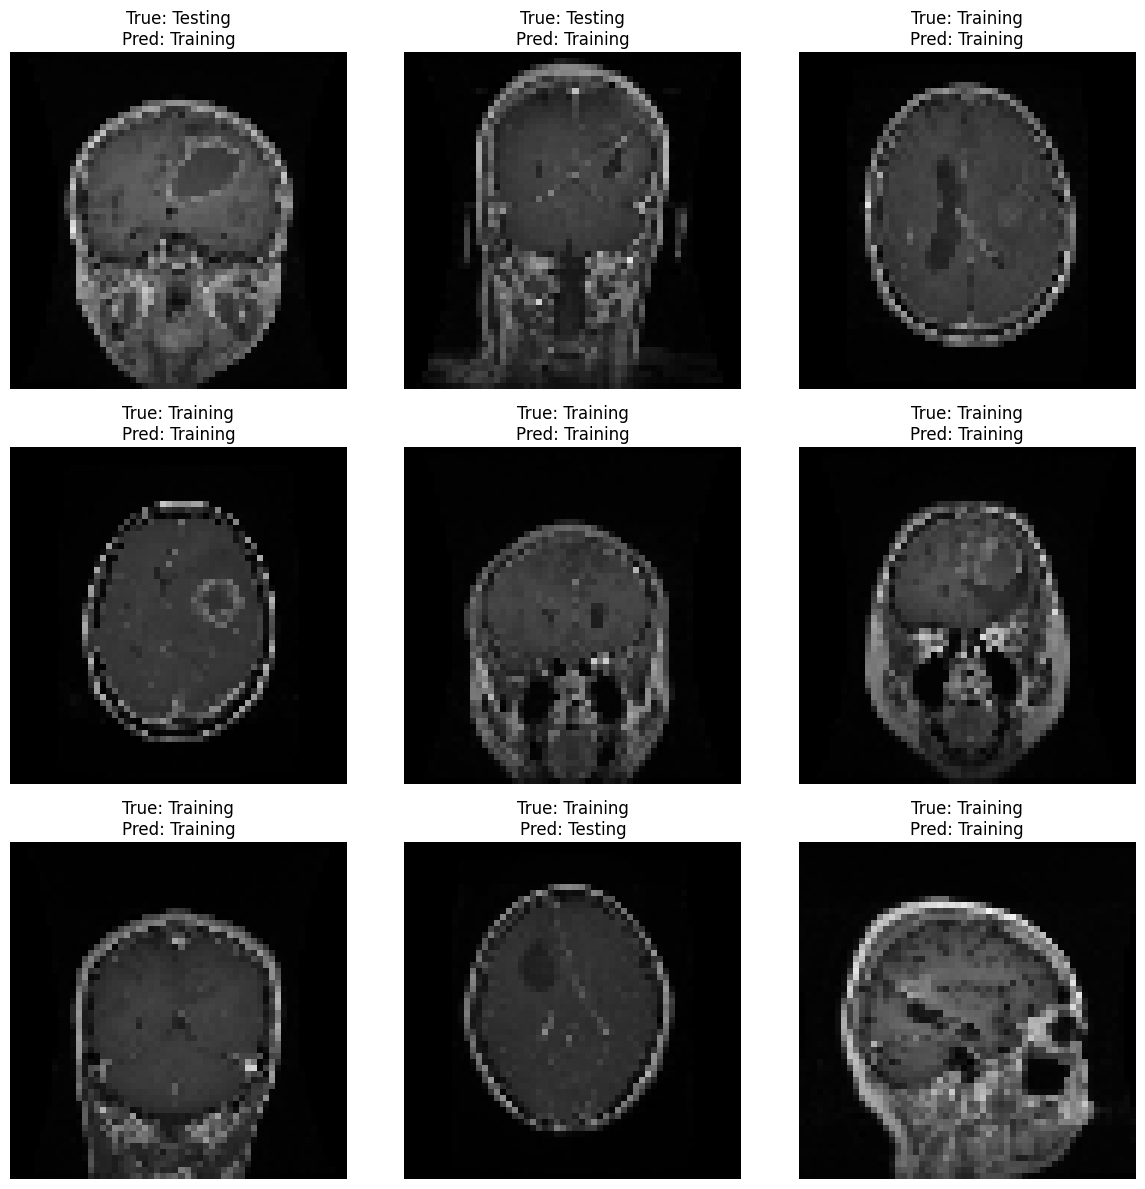

Models built for CNN, RNN, and GANs


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=20)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display actual vs predicted images for CNN
import random

x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8058 - loss: 0.5274 - val_accuracy: 0.8134 - val_loss: 0.4875
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8169 - loss: 0.4841 - val_accuracy: 0.8134 - val_loss: 0.4943
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8112 - loss: 0.4817 - val_accuracy: 0.8134 - val_loss: 0.4927
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8161 - loss: 0.4636 - val_accuracy: 0.8134 - val_loss: 0.4907
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8070 - loss: 0.4737 - val_accuracy: 0.8134 - val_loss: 0.4970
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8099 - loss: 0.4618 - val_accuracy: 0.8134 - val_loss: 0.4927
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8109 - loss: 0.4573 - val_accuracy: 0.8134 - val_loss: 0.5108
Epoch 

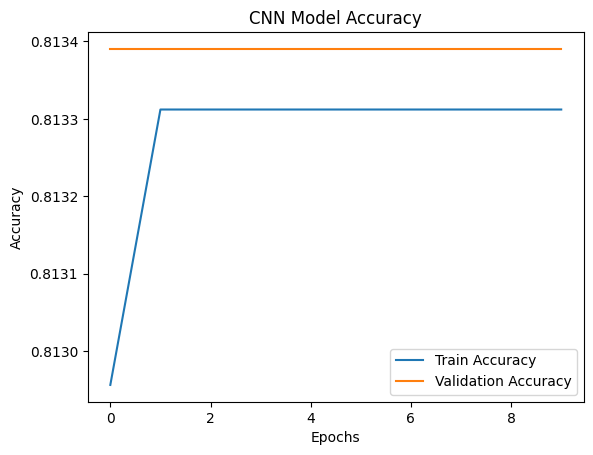

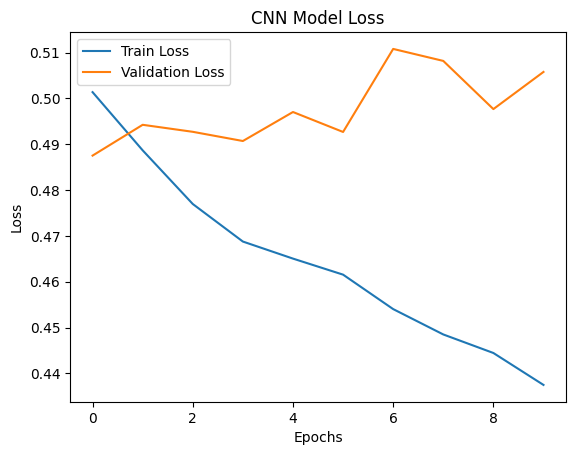

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


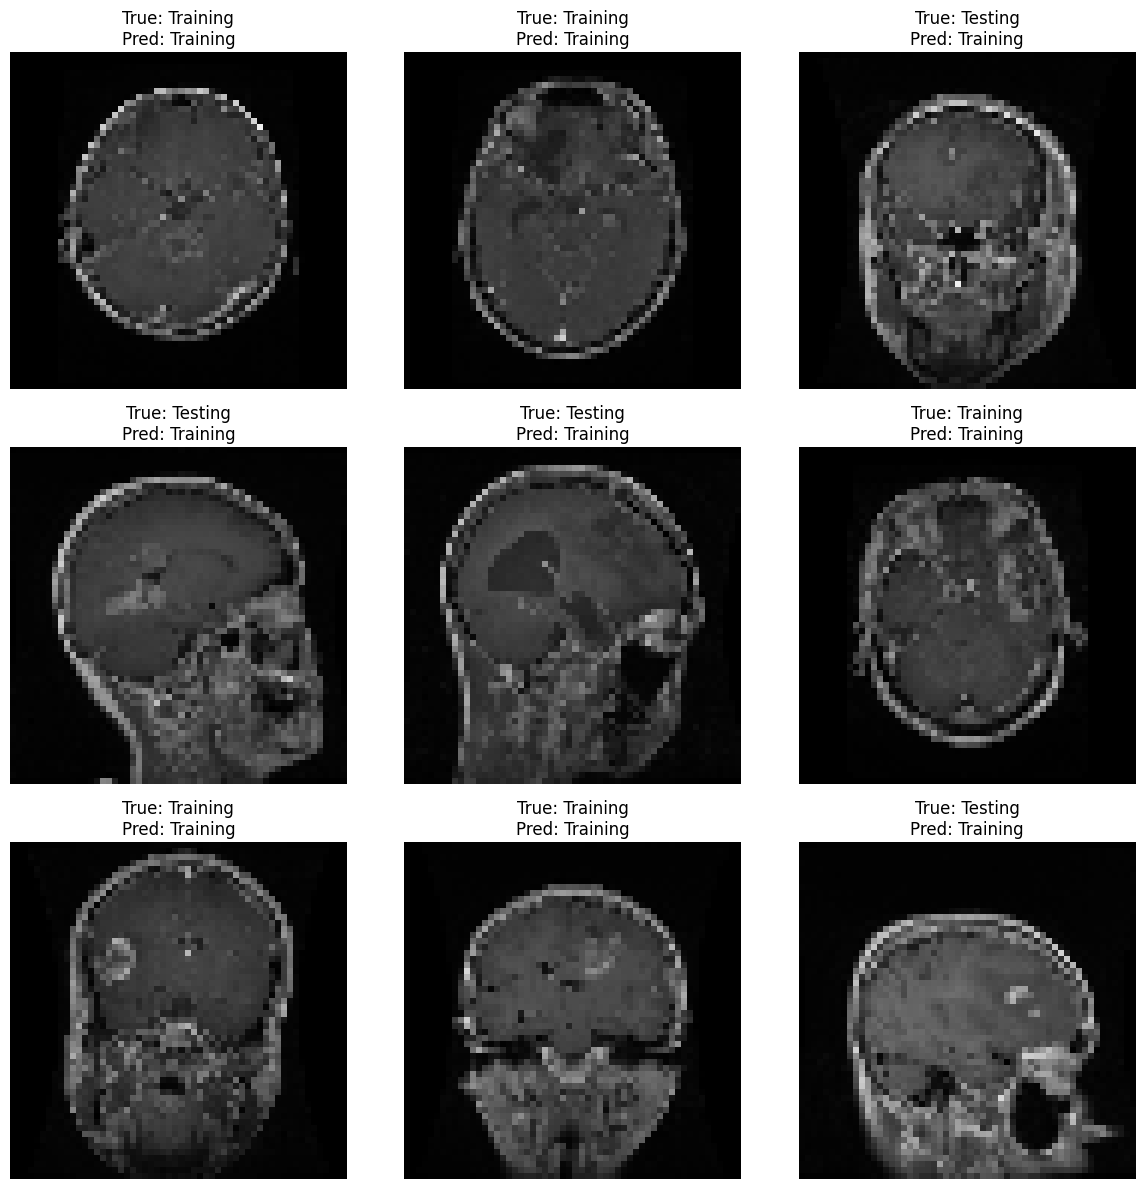

Models built for CNN, RNN, and GANs


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=10)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display actual vs predicted images for CNN
import random

x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.8054 - loss: 0.5106 - val_accuracy: 0.8134 - val_loss: 0.4885
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.8100 - loss: 0.4853 - val_accuracy: 0.8134 - val_loss: 0.4938
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.8131 - loss: 0.4781 - val_accuracy: 0.8134 - val_loss: 0.4983
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8112 - loss: 0.4633 - val_accuracy: 0.8134 - val_loss: 0.4940
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.8075 - loss: 0.4700 - val_accuracy: 0.8134 - val_loss: 0.5057
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8098 - loss: 0.4627 - val_accuracy: 0.8134 - val_loss: 0.5000
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.8182 - loss: 0.4419 - val_accuracy: 0.8134 - val_loss: 0.5132
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8136 - loss: 0.4503 - val_accurac

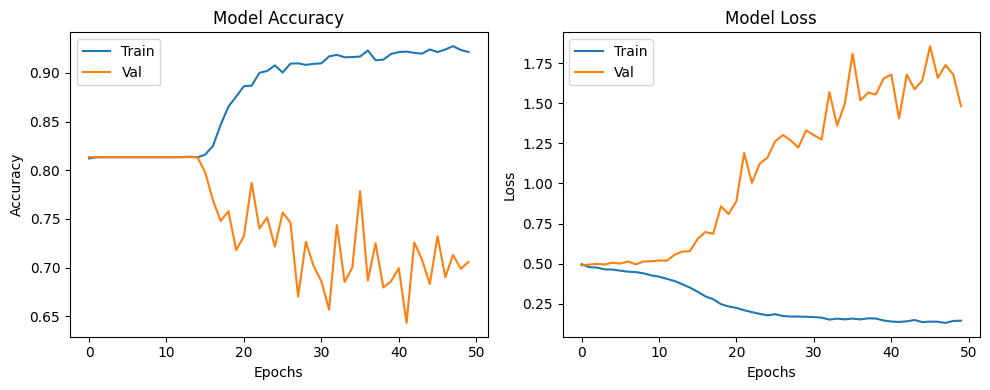

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


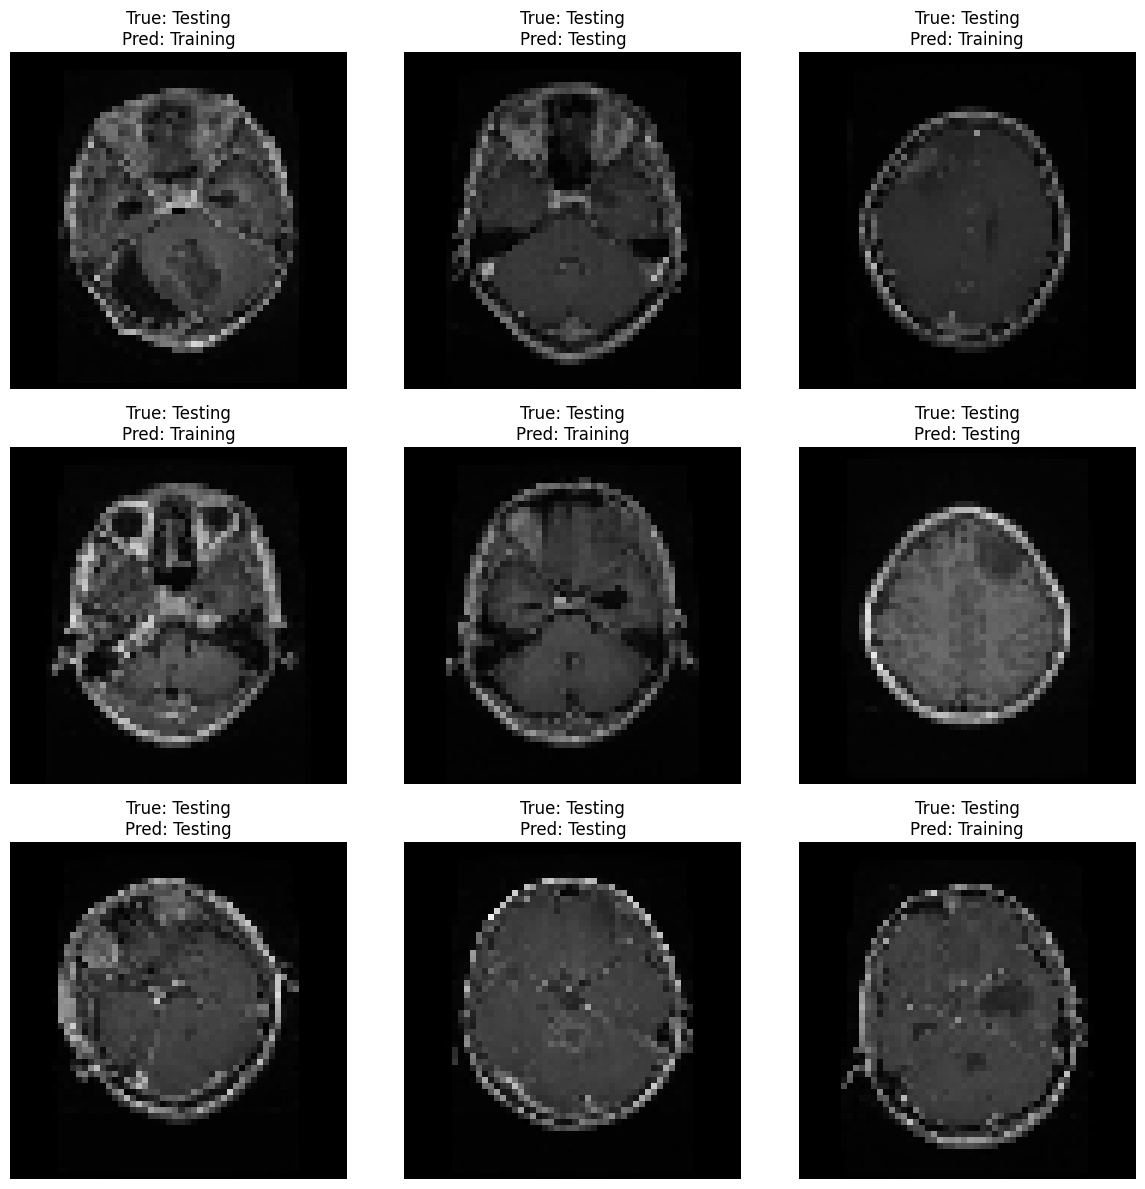

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'  # Update this path as needed

# ----------------------------- Data Preprocessing -----------------------------
# Create image data generators for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(56, 56),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(56, 56),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ----------------------------- Build CNN Model -----------------------------
def build_cnn_model(input_shape=(56, 56, 3), num_classes=2):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

cnn_model = build_cnn_model(num_classes=len(train_data.class_indices))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- Train CNN Model -----------------------------
cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=50)

# ----------------------------- Evaluate Model -----------------------------
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# ----------------------------- Plot Accuracy & Loss -----------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train')
plt.plot(cnn_history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train')
plt.plot(cnn_history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------- Visualize Predictions -----------------------------
x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


2025-04-22 16:58:04.990898: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745341085.248072      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745341085.318054      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.


I0000 00:00:1745341105.351483      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745341111.082461     109 service.cc:148] XLA service 0x7e46bc006c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745341111.083371     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745341111.430122     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/176 ━━━━━━━━━━━━━━━━━━━━ 21:41 7s/step - accuracy: 0.4375 - loss: 0.7083

I0000 00:00:1745341114.597002     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 215ms/step - accuracy: 0.8007 - loss: 0.5539 - val_accuracy: 0.8134 - val_loss: 0.4859
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.8150 - loss: 0.4792 - val_accuracy: 0.8134 - val_loss: 0.4901
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.8204 - loss: 0.4647 - val_accuracy: 0.8134 - val_loss: 0.4847
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.8092 - loss: 0.4659 - val_accuracy: 0.8134 - val_loss: 0.4901
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.8133 - loss: 0.4573 - val_accuracy: 0.8134 - val_loss: 0.4955
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.8173 - loss: 0.4506 - val_accuracy: 0.8134 - val_loss: 0.4911
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.8167 - loss: 0.4458 - val_accuracy: 0.8134 - val_loss: 0.4938
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8157 - loss: 0.4403 - val_accura

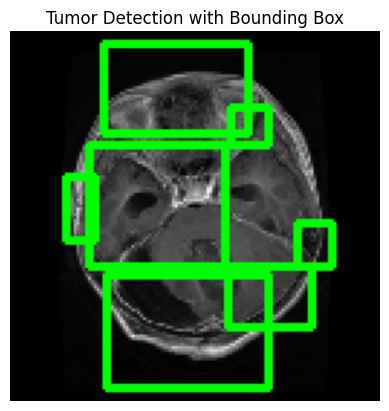

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


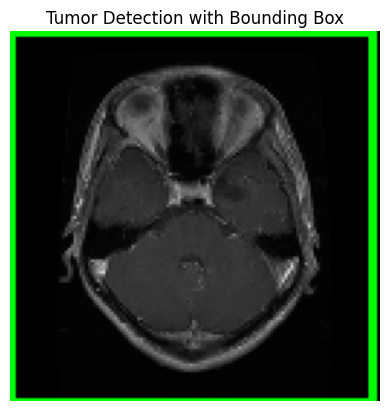

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


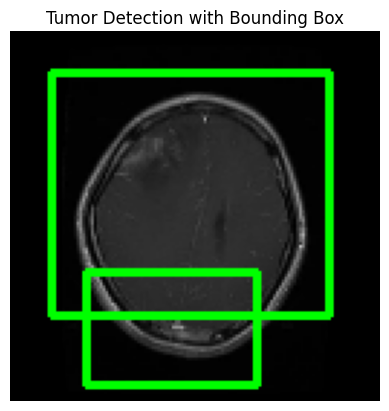

In [1]:
# Install OpenCV (if you're on Colab or Kaggle)
!pip install opencv-python

# ----------------------------- Imports -----------------------------
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ----------------------------- Data Preparation -----------------------------
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ----------------------------- CNN Model (Functional API) -----------------------------
def build_cnn_model(input_shape=(128, 128, 3), num_classes=2):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='last_conv')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

cnn_model = build_cnn_model(num_classes=len(train_data.class_indices))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- Training -----------------------------
cnn_model.fit(train_data, validation_data=val_data, epochs=50)

# ----------------------------- Grad-CAM Helper -----------------------------
def get_grad_cam(model, img_tensor, class_index):
    grad_model = models.Model([model.inputs], [model.get_layer("last_conv").output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon()
    return heatmap.numpy()

# ----------------------------- Bounding Box Drawing -----------------------------
def show_bounding_box(img, heatmap):
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    thresh = np.uint8(255 * heatmap_resized)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_bgr = np.uint8(img * 255)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h > 100:  # filter small areas
            cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Tumor Detection with Bounding Box")
    plt.show()

# ----------------------------- Visualize on Validation Samples -----------------------------
for i in range(3):  # Display 3 validation examples
    x, y = val_data[i]

    pred = cnn_model.predict(x)
    class_idx = np.argmax(pred[0])

    heatmap = get_grad_cam(cnn_model, x, class_idx)
    show_bounding_box(x[0], heatmap)


Epoch 1/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.5416 - loss: 0.8566 - val_accuracy: 0.4750 - val_loss: 0.6928
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5207 - loss: 0.6925 - val_accuracy: 0.5250 - val_loss: 0.6932


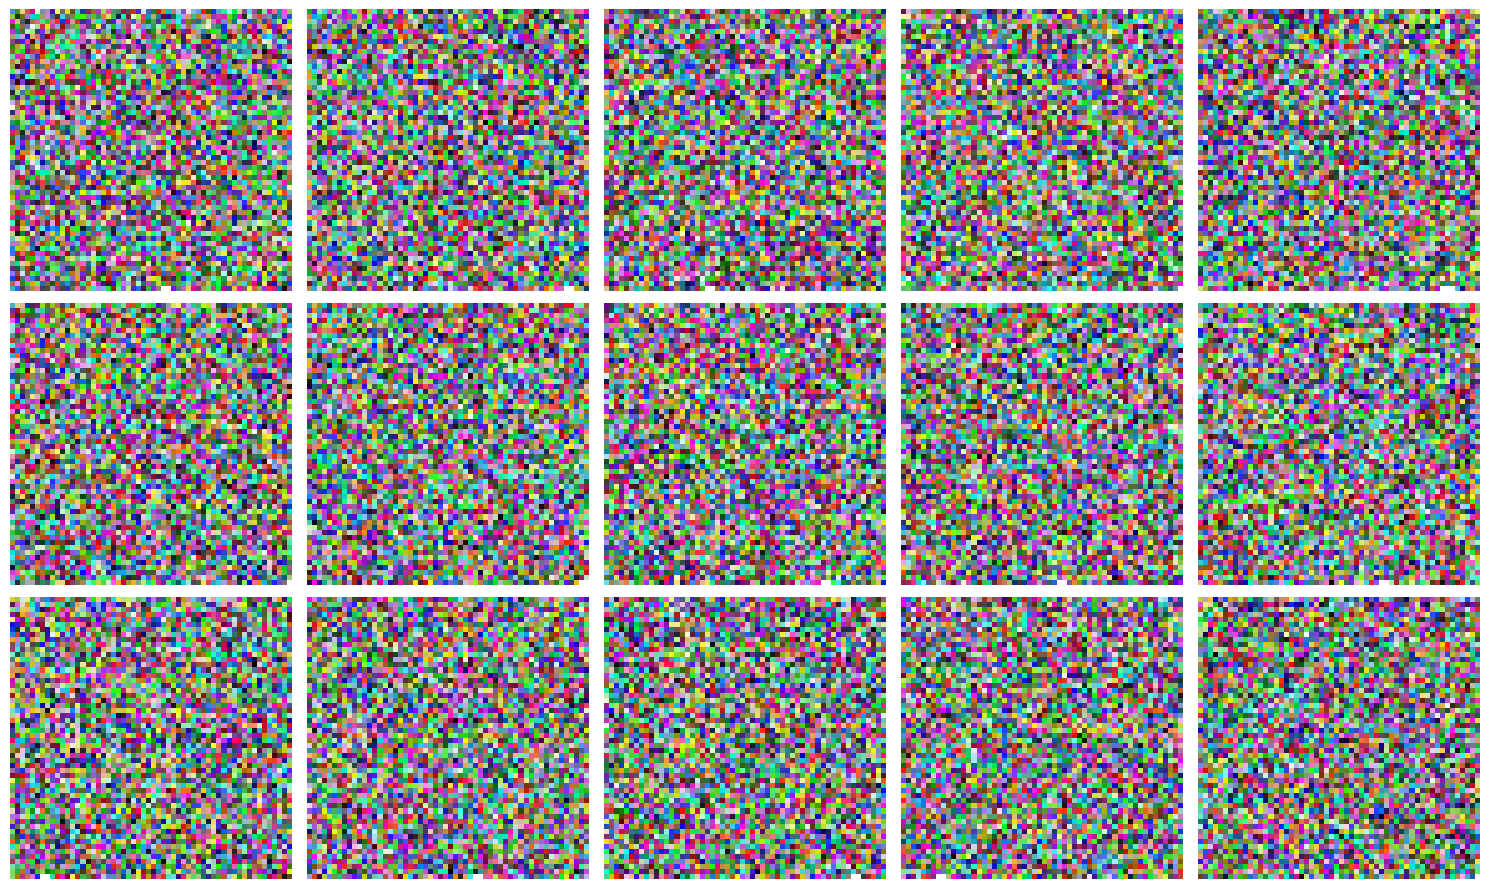

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# ------------------- Data Loader -------------------
def load_fake_brain_tumor_data(samples=1000, img_size=(56, 56)):
    X = np.random.rand(samples, img_size[0], img_size[1], 3).astype(np.float32)
    y = np.random.randint(0, 2, size=(samples,))
    y = to_categorical(y, 2)
    return X, y

# ------------------- CNN Model -------------------
def build_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', name='last_conv')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

# ------------------- Grad-CAM -------------------
def get_grad_cam(model, img_tensor, class_index):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer("last_conv").output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon()
    return heatmap.numpy()

# ------------------- Draw Box -------------------
def draw_box(img, heatmap, threshold=0.5):
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    mask = heatmap_resized > threshold
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_disp = (img * 255).astype(np.uint8)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        cv2.rectangle(img_disp, (x, y), (x + w, y + h), (255, 255, 255), 1)
    return img_disp

# ------------------- Display Grid -------------------
def display_image_grid(model, X_samples, grid_shape=(3, 5)):
    fig, axes = plt.subplots(*grid_shape, figsize=(15, 9))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        x = X_samples[i:i+1]
        pred = model.predict(x, verbose=0)
        class_idx = np.argmax(pred[0])
        heatmap = get_grad_cam(model, x, class_idx)
        boxed_img = draw_box(x[0], heatmap)

        ax.imshow(boxed_img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# ------------------- Main -------------------
X, y = load_fake_brain_tumor_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = build_cnn_model(input_shape=X.shape[1:], num_classes=2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

display_image_grid(model, X_test, grid_shape=(3, 5))  # 15 samples
